In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
Xtr = pd.read_csv('Xtr_Final.csv')
Xte = pd.read_csv('Xte_Final.csv')
Ytr = pd.read_csv('Ytr.csv')

In [3]:
models = {
    'Linear Regression': LinearRegression(),
    'LASSO': Lasso(),
    'RandomForestRegressor': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'XGBoost': XGBRegressor(),
}

In [4]:
Y = Ytr["Sale_Amount"]

rmse_scores = {model_name: [] for model_name in models}

num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=123)

for model_name, model in models.items():
    for train_index, val_index in kf.split(Xtr):
        X_train, X_val = Xtr.iloc[train_index], Xtr.iloc[val_index]
        Y_train, Y_val = Y.iloc[train_index], Y.iloc[val_index]

        model.fit(X_train, Y_train)
        Y_val_pred = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(Y_val, Y_val_pred))
        rmse_scores[model_name].append(rmse)

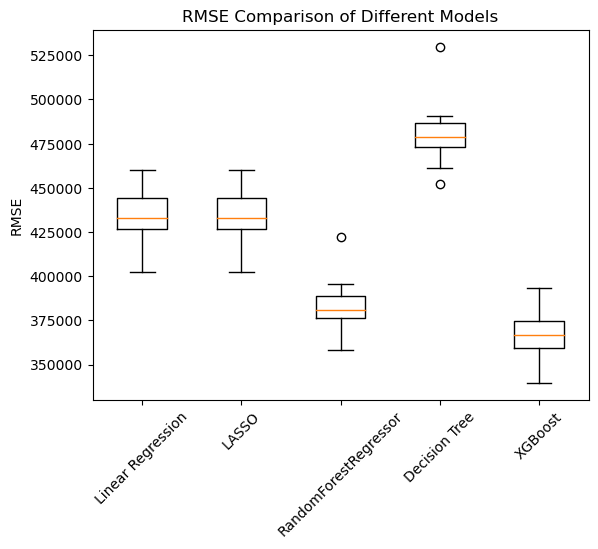

In [5]:
fig, ax = plt.subplots()
ax.boxplot(rmse_scores.values())
ax.set_xticklabels(rmse_scores.keys())
ax.set_title('RMSE Comparison of Different Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()